<div style="display: flex;">
    <img src="jpg/netflix.jpg" alt="logo" style="width:300px;height:200px; margin-left: 10px;">
</div>

### Veri Seti Hakkında

<p> Netflix, en popüler medya ve video yayınlama platformlarından biridir. 2021 yarısında, küresel olarak 200 milyondan fazla aboneye sahiptir. Bu tablo veri seti, Netflix platformunda bulunan tüm filmlerin ve TV şovlarının listelerini içerir ve detaylarını içerir - oyuncular, yönetmenler, derecelendirmeler, yayın yılı, süre vb.</p><br>




   - Veri Boyutu: Veri kümesi 8807 satır ve 12 sütundan oluşmaktadır, analiz için önemli miktarda bilgi sunmaktadır.
   - Veri Türleri: Veri kümesi int64 ve object gibi çeşitli veri türlerini içermektedir.
   - Eksik Değerler: Birkaç sütun eksik değerler içermekte olup, "director," "cast," "country," "date_added," "rating," ve "duration" değişkenleri farklı derecelerde eksik değerler içermektedir. Eksik değerlerin ele alınması sağlam analiz için önemlidir.
   - Benzersiz Değerler: Veri kümesi 0 tekrarlayan değer içermektedir, her bir satırın benzersiz bilgiyi temsil ettiğini göstermektedir, tekrarlanan veri yoktur.
   - İlgisiz Özellikler: Çoğu özellik ilgili görünmektedir, ancak "show_id" ve "date_added" özellikleri analiz için potansiyel olarak ilgisiz olabilir ve daha fazla değerlendirmeden çıkarılabilir.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings # handle warning messages
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

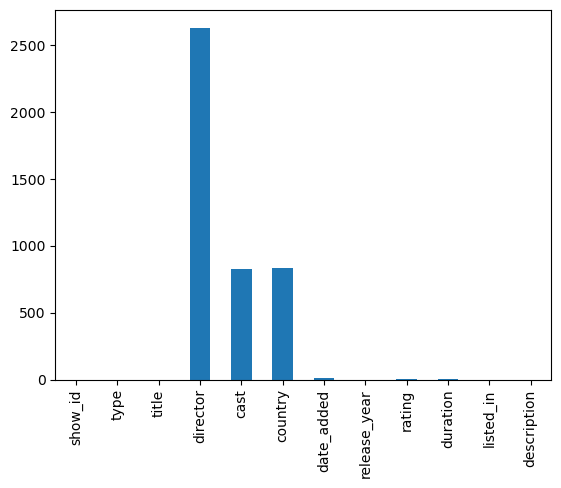

In [7]:
df.isnull().sum().plot(kind='bar')

In [8]:
# Missing Values Drop Edilmesi
netflix=df.dropna()

# Veri Setinin Drop Sonrası Şekli
print(f'Veri Seti, {netflix.shape[0]} satır ve {netflix.shape[1]} sütundur.')

Veri Seti, 5332 satır ve 12 sütundur.




<div style="color:green;">
    <b>Netflix Veri Seti için 'type' sütunu iki farklı değer içerir:

       - "Movie": Filmler olarak sınıflandırılan içeriği temsil eder.<br>
       - "TV Show": TV şovları olarak sınıflandırılan içeriği temsil eder.</b>
</div>

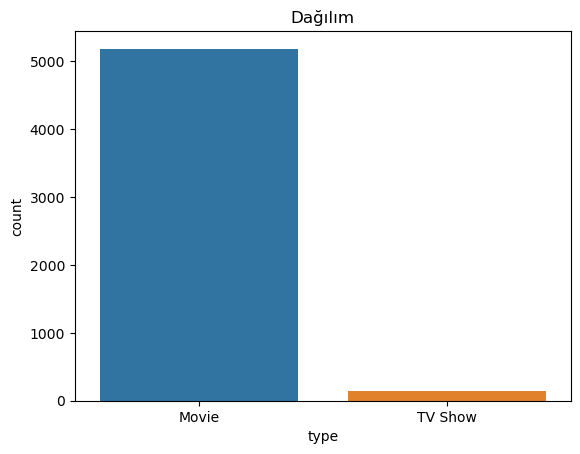

In [9]:
# Countplot İle Type'ların Gösterilmesi
sns.countplot(data=netflix, x='type')

# Title Belirlenmesi
plt.title('Dağılım')

# Countplot'un Gösterilmesi
plt.show()

In [10]:
# Genele Bakıldığında Filmlerin Dağılımının Daha Fazla Olduğu Görülüyor.

In [11]:
# Filmler Daha Fazla Olduğundan Dolayı Filmleri Ele Alarak İlerleyebiliriz.

In [12]:
# Film Değişkeni Oluşturup type == Movie Olanları Bu Değişkene Atadık.
# Ardından duration type'ı İçin int Dönüşümü Yaptık ve "min" kısmını replace ettik. (null)
movie = netflix[netflix['type'] == 'Movie']
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)
print(movie['duration'].dtype) # OUTPUT = int32

int32


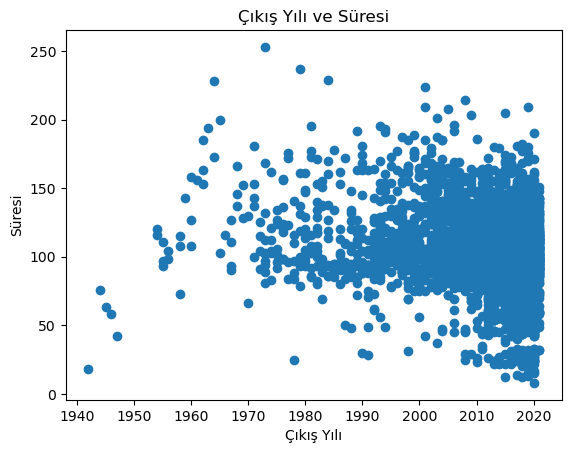

In [13]:
# Çıkış Tarihi ve Süresi İçin scatter plot Oluşturulması
plt.scatter(movie['release_year'], movie['duration'])

# xlabel, ylabel ve title belirlenmesi
plt.xlabel('Çıkış Yılı')
plt.ylabel('Süresi')
plt.title('Çıkış Yılı ve Süresi')
plt.show()

In [14]:
# Minimum süreye sahip olan satırın indeksinin bulunması.
minDurationIndex = movie['duration'].idxmin()

# Karşılık gelen yayın yılının ve sürenin değişkenlere atanması.
minReleaseYear = movie.loc[minDurationIndex, 'release_year']
minDuration = movie.loc[minDurationIndex, 'duration']

print(f"En Kısa Süreli Film {minDuration} Dakika ve {minReleaseYear} Yılında Çıktı.")

# Maksimum süreye sahip olan satırın indeksinin bulunması.
maxDurationIndex = movie['duration'].idxmax()

# Karşılık gelen yayın yılının ve sürenin değişkenlere atanması.
maxReleaseYear = movie.loc[maxDurationIndex, 'release_year']
maxDuration = movie.loc[maxDurationIndex, 'duration']

print(f"En Uzun Süreli Film {maxDuration} Dakika ve {maxReleaseYear} Yılında Çıktı.")

En Kısa Süreli Film 8 Dakika ve 2020 Yılında Çıktı.
En Uzun Süreli Film 253 Dakika ve 1973 Yılında Çıktı.


In [15]:
# 'listed_in' sütunundaki her benzersiz değerin kaç tane olduğunun bulunması.
genreCounts = movie['listed_in'].value_counts()
print(genreCounts)

listed_in
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: count, Length: 268, dtype: int64


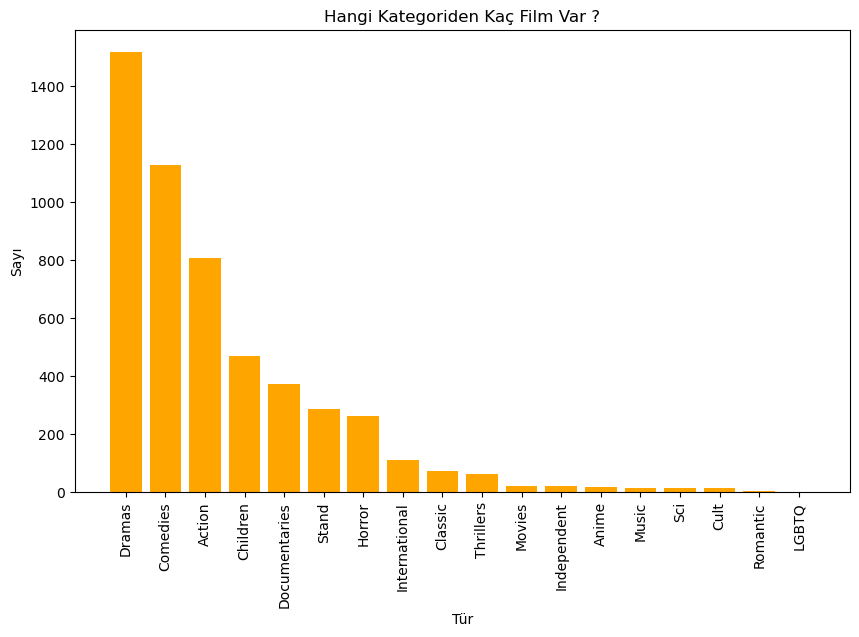

In [16]:
# listed_in İçin extract işlemi.
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Her türün sayısının bulunması.
genreCountsMovie = movie['genres'].value_counts().reset_index()

# Sütunların yeniden adlandırılması.
genreCountsMovie.columns = ['genre', 'count']

# Grafiksel olarak gösterilmesi.
plt.figure(figsize=(10, 6))
plt.bar(genreCountsMovie['genre'], genreCountsMovie['count'], color='orange')
plt.xlabel('Tür')
plt.ylabel('Sayı')
plt.title('Hangi Kategoriden Kaç Film Var ?')
plt.xticks(rotation=90)
plt.show()

In [17]:
# En Çok İçerik Üreten Ülkeler Hangileri
topCountries = (
    df['country']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)
print(topCountries)

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


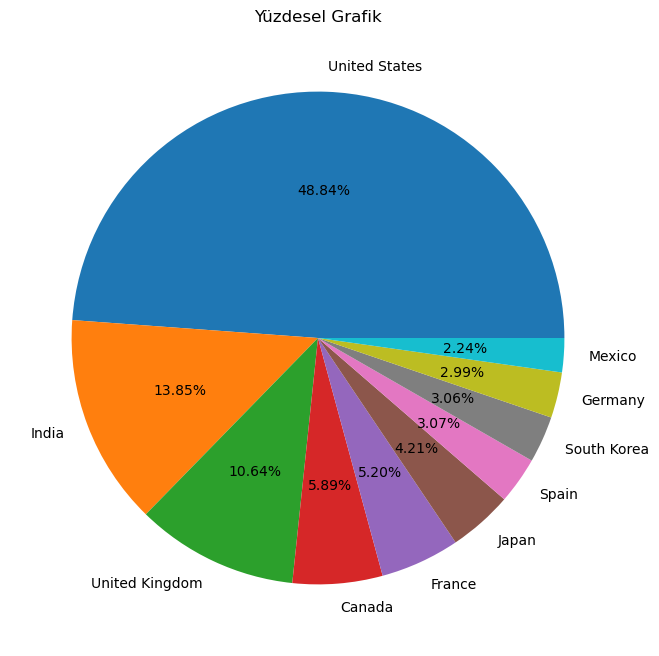

In [18]:
plt.figure(figsize=(9, 8))
plt.pie(x=topCountries.values, labels=topCountries.index, autopct='%.2f%%')
plt.title('Yüzdesel Grafik')
plt.show()

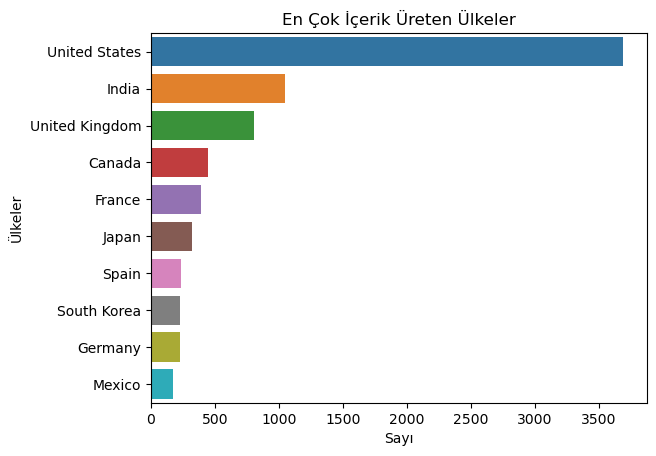

In [19]:
sns.barplot(x=topCountries.values, y=topCountries.index)
plt.xlabel('Sayı')
plt.ylabel('Ülkeler')
plt.title('En Çok İçerik Üreten Ülkeler')
plt.show()

In [20]:
# En çok kullanılan derecelendirme sistemi sıralaması
ratings = (
    df['rating']
    .value_counts()
    .head(8)
)
ratings

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
Name: count, dtype: int64